In [32]:
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.graph_objs as go 
import plotly.tools as tls
import plotly.offline as py

In [33]:
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")


In [34]:
matches.drop(['umpire3'],axis=1,inplace=True)  
deliveries.fillna(0,inplace=True)  

In [35]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           633 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  633 non-null    object
 14  venue            636 non-null    object
 15  umpire1          635 non-null    object
 16  umpire2          635 non-null    object
dtypes: int64(5), object(12)
memory usag

In [36]:
matches['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [37]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


In [38]:
matches["player_of_match"].value_counts()

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: count, Length: 201, dtype: int64

Chris Gayle has most player of the matches

In [39]:
matches['winner'].value_counts()

winner
MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
RR      63
DD      62
SRH     42
DC      29
RPS     15
GL      13
PW      12
KTK      6
Name: count, dtype: int64

MI has won most mathces

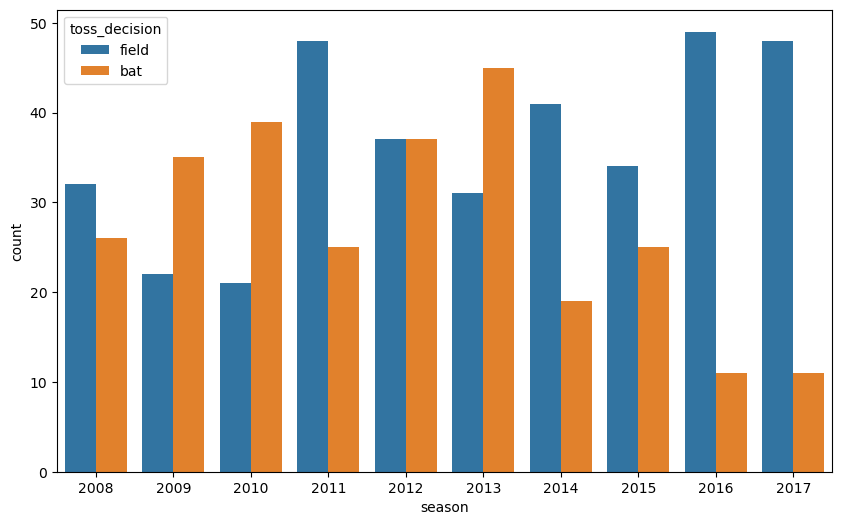

In [40]:
plt.subplots(figsize=(10,6))
sns.countplot(x="season",hue="toss_decision",data=matches)
plt.show()

In 2016 though fieldinf is opted more often by toss winners

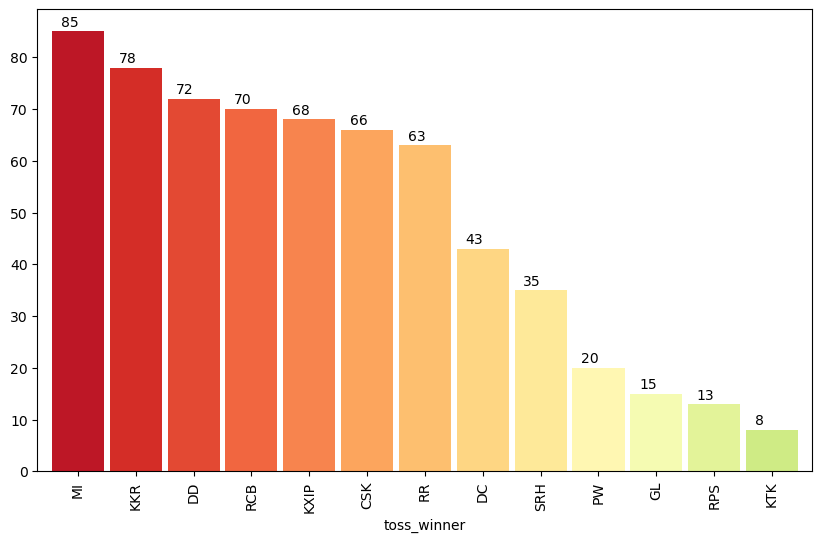

In [41]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Mumbai indians have won most amount of tosses

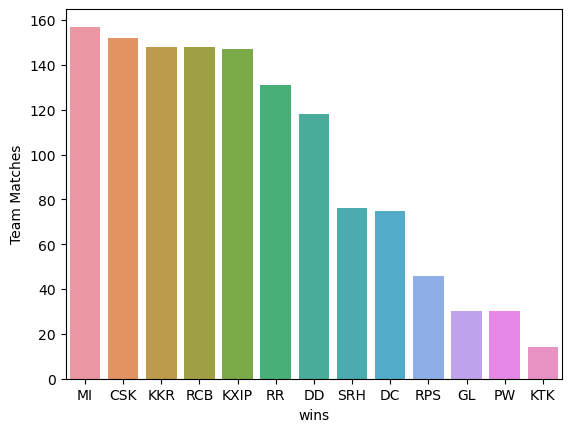

In [48]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index() #Sets the index as the teams and the nmber of matches played as another column

#changing the columns
matches_played_byteams.columns=['Team','Team Matches']

#Winning teams
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']

#Setting the index  to be the team
matches_played_byteams.set_index('Team',inplace=True)

# t1=go.Bar(x=matches_played_byteams.index,y=matches_played_byteams['Team Matches'],name='Total Matches')
# t2=go.Bar(x=matches_played_byteams.index,y=matches_played_byteams['wins'],name='matches won')
# data=[t1,t2]
# layout=go.layout(barmode="stack")
# fig=go.Figure(data=data,layout=layout)
# py.iplot(fig, filename='stacked-bar')
matches_played_byteams.head()

sns.barplot(x='wins',y='Team Matches',data=matches_played_byteams)
plt.show()


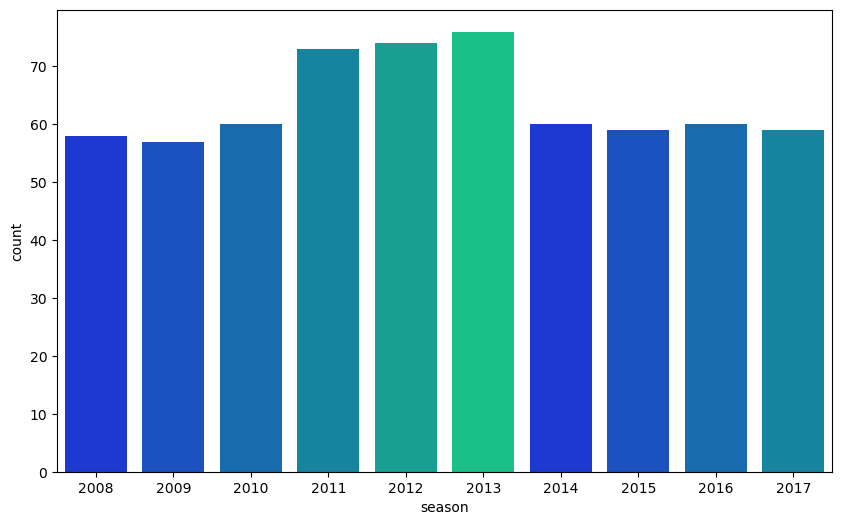

In [50]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()

Runs across the Seasons

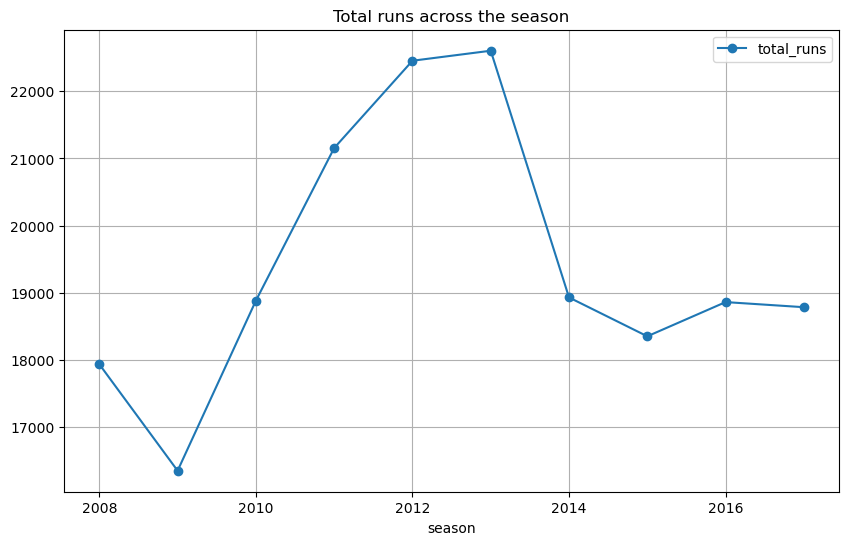

In [52]:
batsmen=matches[['id','season']].merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)

season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

season.set_index('season').plot(marker='o')

plt.gcf().set_size_inches(10,6)
plt.title('Total runs across the season')
plt.grid(True)
plt.show()


Most runs were scored during the 2013 season.But since the number of matches vary so average runs should be the appropriate metric

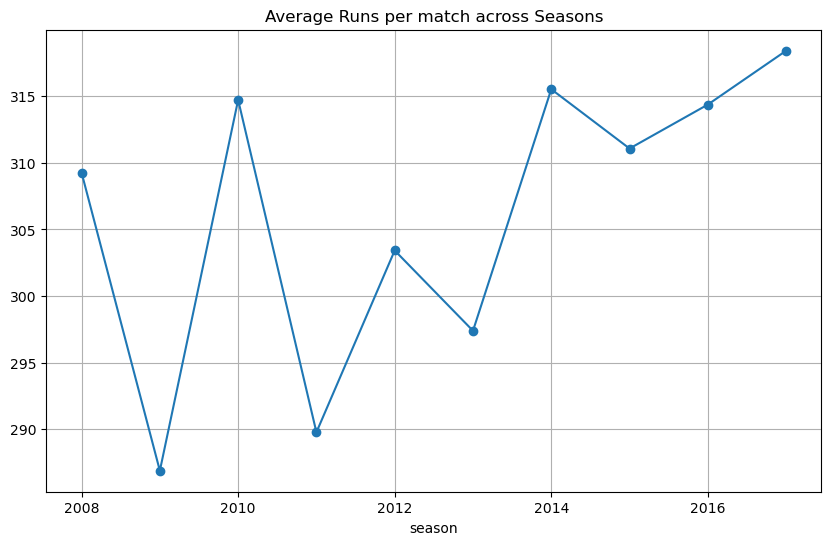

In [54]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.grid(True)
plt.show()

This shows that in 2014 the average runs scored was the highest

Boundaries

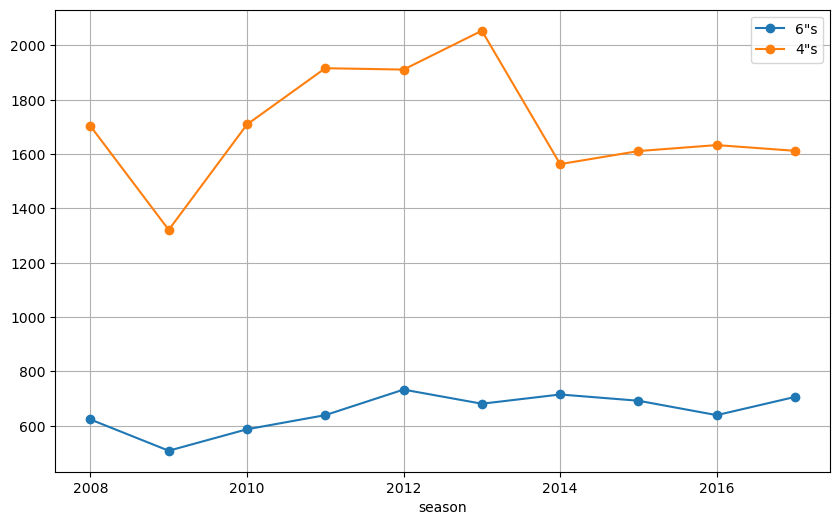

In [64]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.grid(True)
plt.show()

Run rate of Teams

C:\Users\Admin\AppData\Local\Temp\ipykernel_8484\2248378732.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



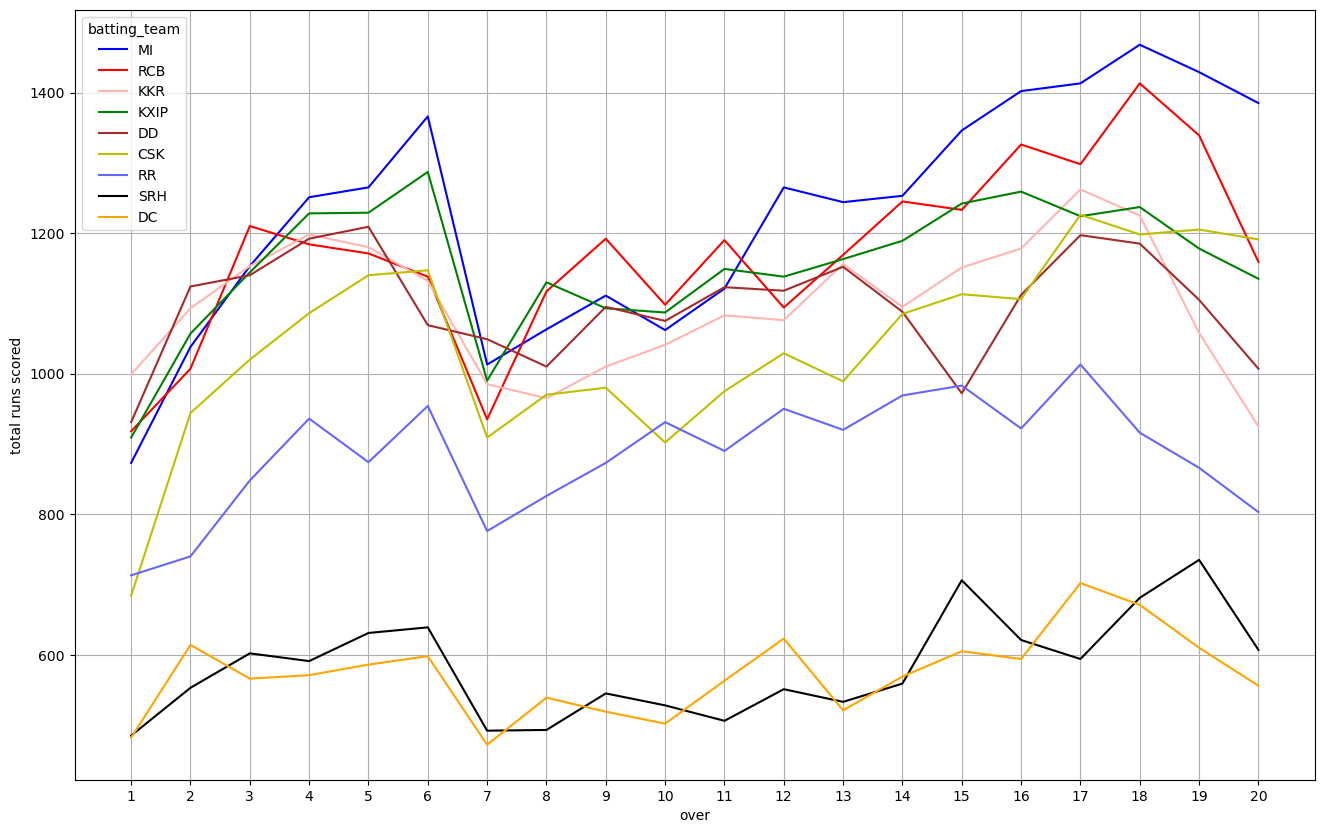

In [68]:
runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Team Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.grid(True)
plt.show()

Ground

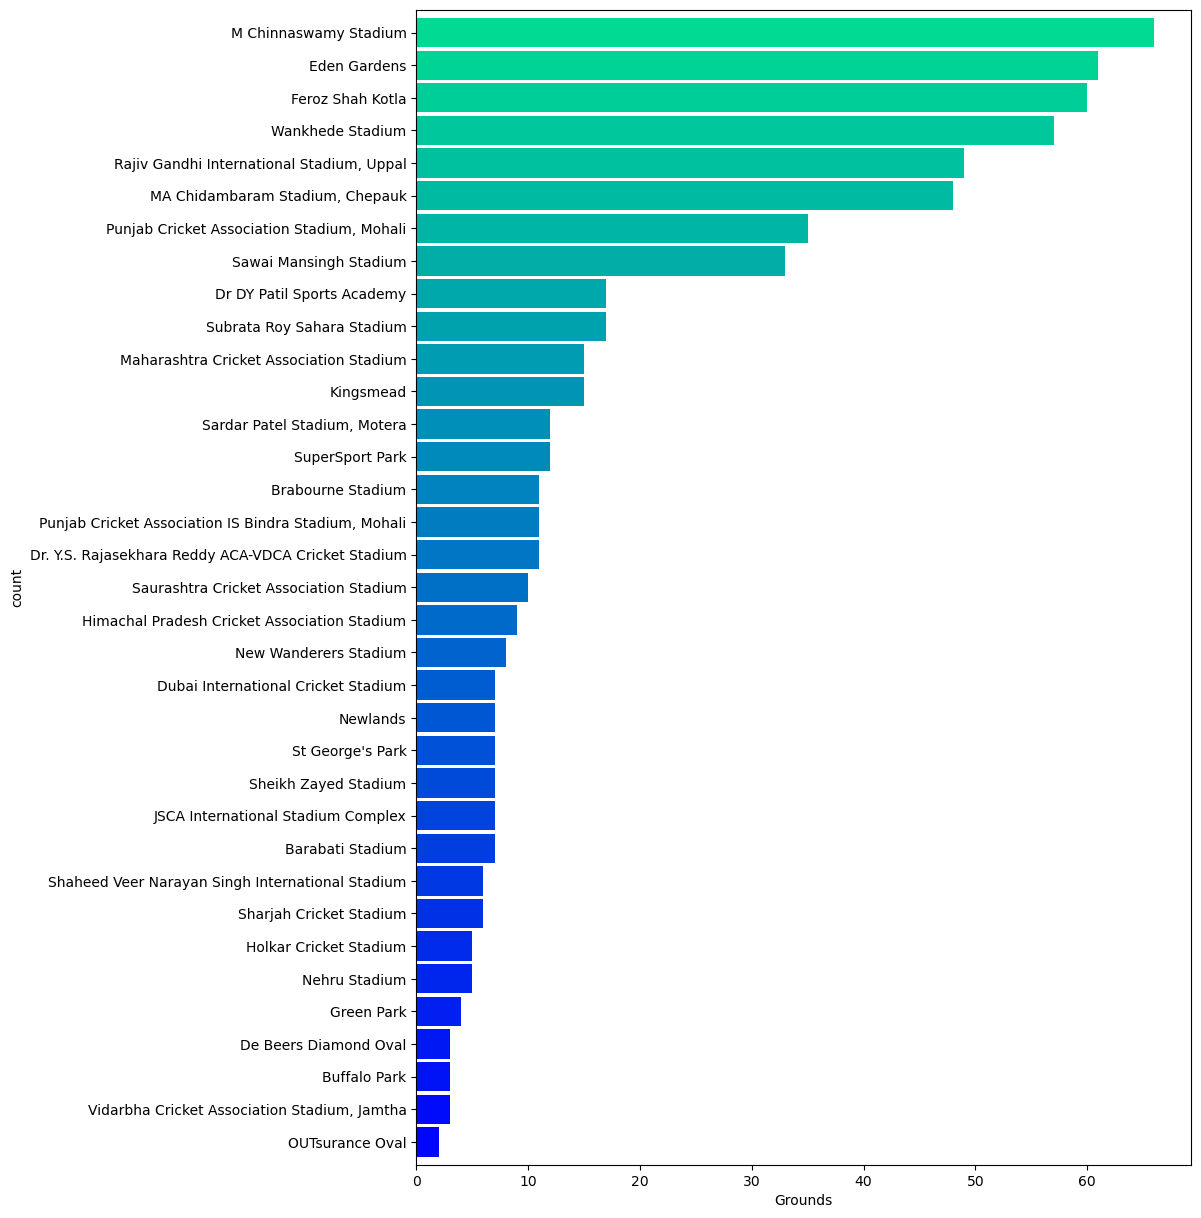

In [71]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('winter',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

Man of the Match

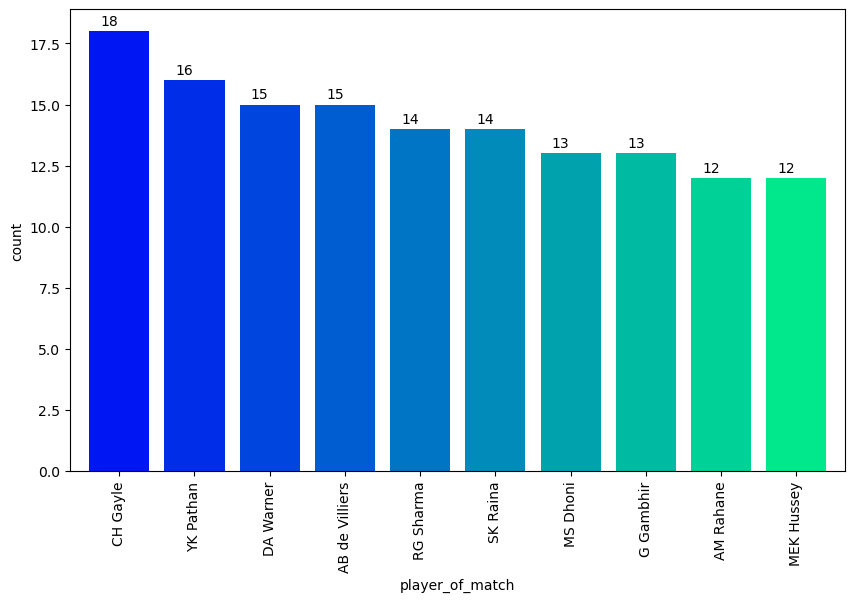

In [73]:

plt.subplots(figsize=(10,6))
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('winter',10))  #counts the values corresponding 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

Score in an innings

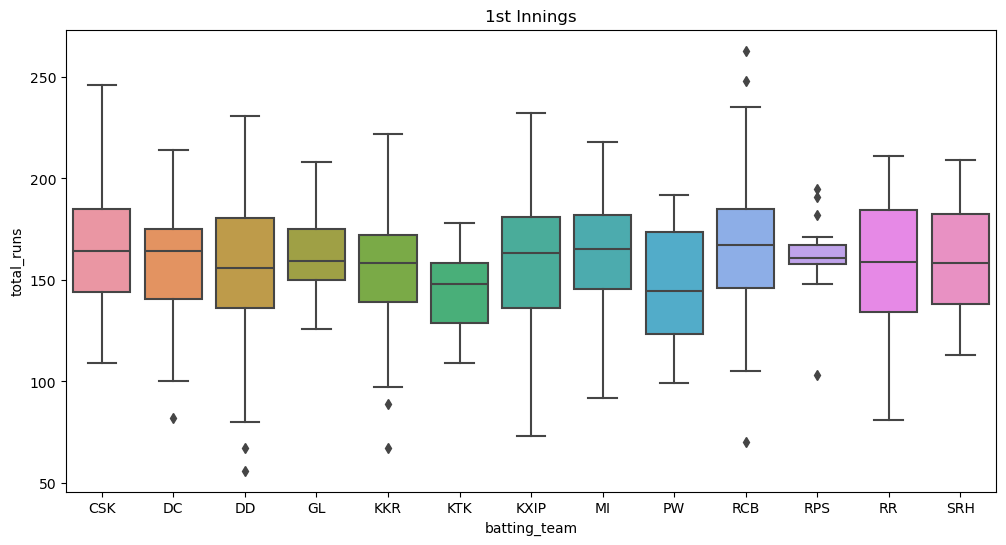

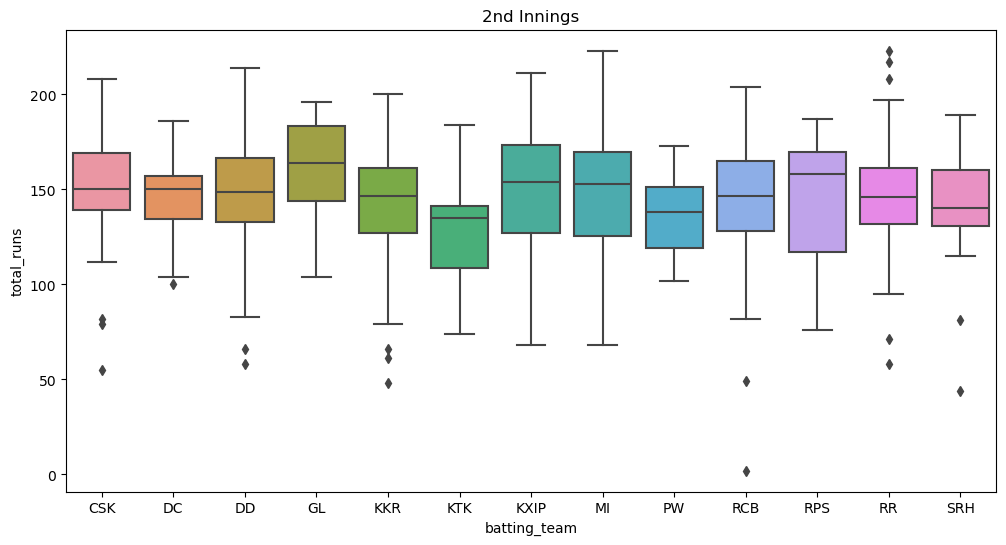

In [75]:
plt.subplots(figsize=(12,6))
xyz=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=plt.gcf()
fig.set_size_inches(12,6)

Seems to appear that there is some outliers in the data

Batsmen Analysis

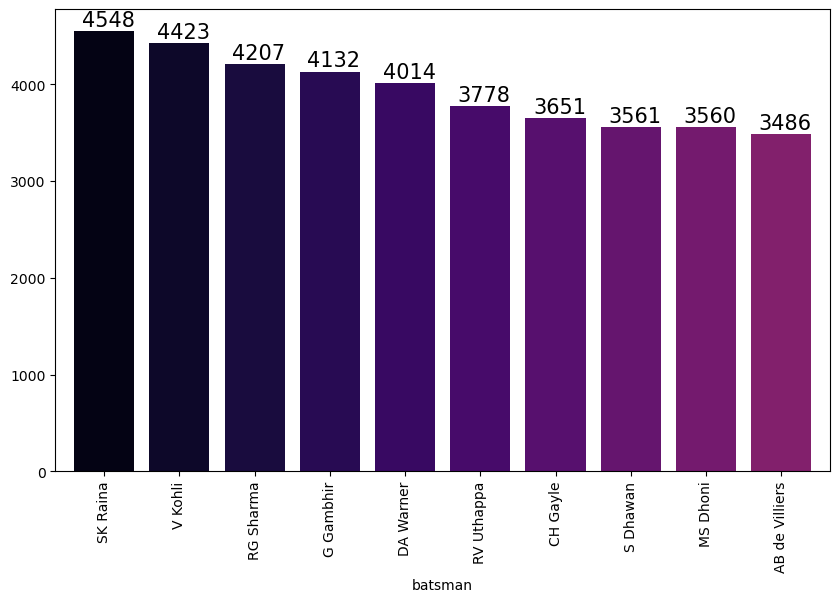

In [84]:
plt.subplots(figsize=(10,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('inferno',27))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

Top Scores

In [85]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


Highes score is scored by chris Gayle

c:\Users\Admin\anaconda3\envs\kitchen\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Admin\anaconda3\envs\kitchen\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Admin\anaconda3\envs\kitchen\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\anaconda3\envs\kitchen\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\anaconda3\envs\kitchen\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

35.7% of the points cannot be placed;

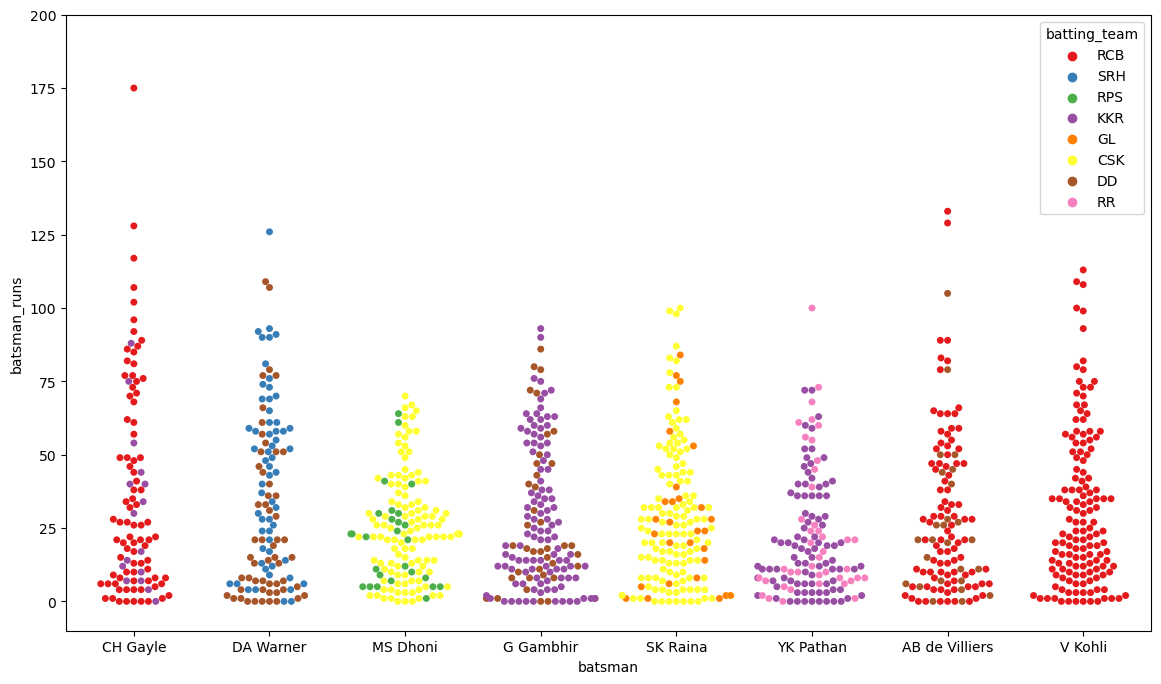

In [88]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()

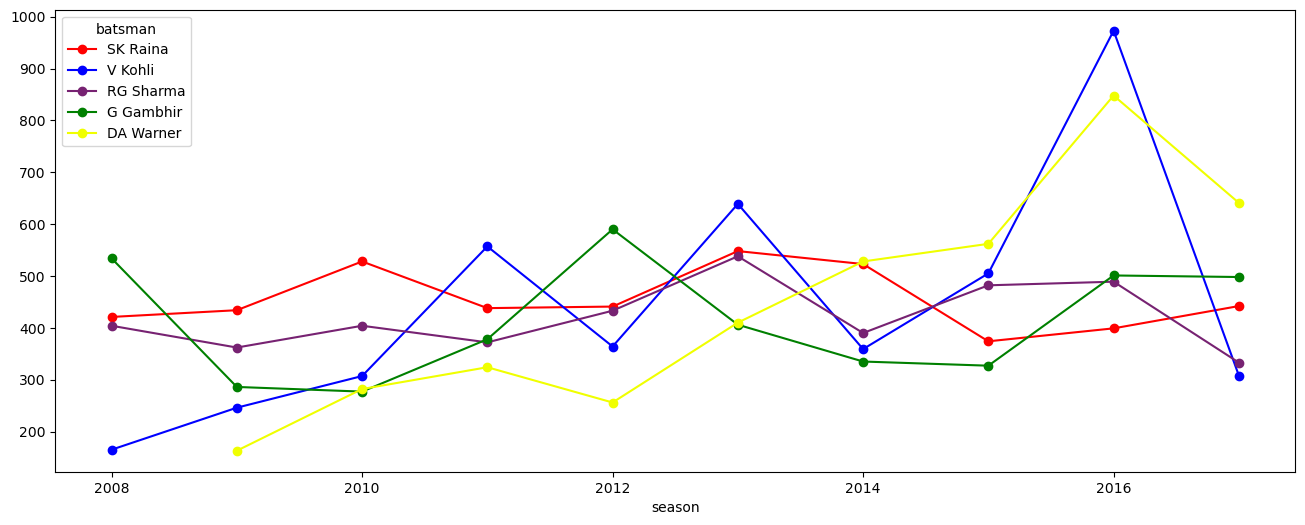

In [89]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

Bowlers

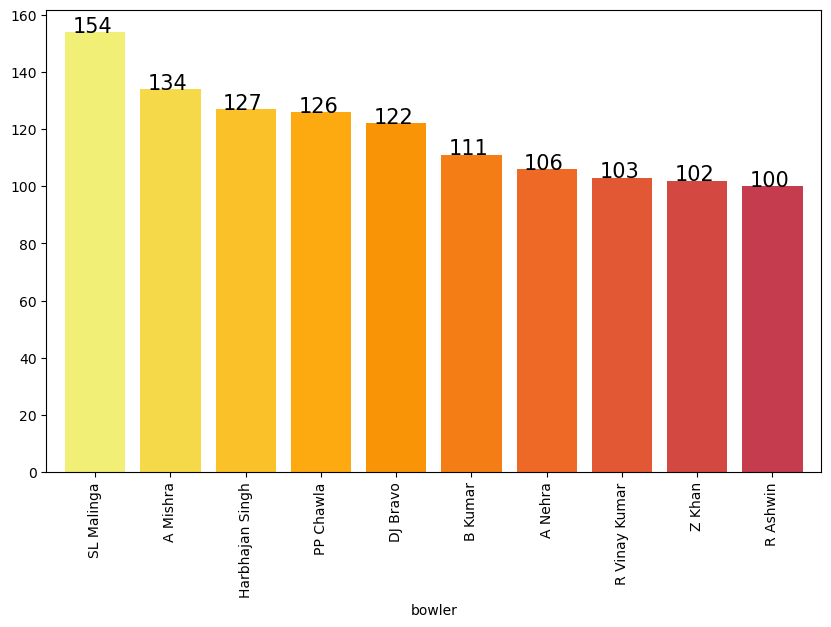

In [91]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('inferno_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

Hence statistically Malinga is the best bowler followed by A mishra but this is in terms of only wicket but economy is also important for a bolwer

In [ ]:
# eco=deliveries.groupby(['bowler']).sum()
# eco['total balls']=deliveries['bowler'].value_counts()
# eco['overs']=(eco['total balls']//6)
# eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

Hence is terms of wicket and economy A Mishra and Malinga are top bowlers